In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

ModuleNotFoundError: No module named 'plotly'

In [65]:
waterdata = pd.read_excel("C:/Users/Acer/Downloads/waterconsumptiondata.xlsx") 
waterdata   

In [48]:
waterdata_no_missing = waterdata.dropna()
waterdata_no_missing

,Connection Type,Service Station Name,Previous Reading,Present Reading,Consumption,Month Year,Bore Well,Initial Date,Meter Make
0,Domestic,Sudhamanagar,93000,100000,7000,817.0,0.0,2015-11-13 00:00:00,KONARK
1,Domestic,Sudhamanagar,88000,96000,8000,817.0,0.0,2015-11-13 00:00:00,KONARK
2,Domestic,Sudhamanagar,93000,100000,7000,817.0,0.0,2015-11-13 00:00:00,KONARK
3,Domestic,Sudhamanagar,93000,100000,7000,817.0,0.0,2015-11-16 00:00:00,KONARK
4,Domestic,Sudhamanagar,85000,93000,8000,817.0,0.0,2015-11-16 00:00:00,KONARK
5,Domestic,Sudhamanagar,128000,135000,7000,817.0,0.0,2015-06-26 00:00:00,KONARK
6,Domestic,Sudhamanagar,125000,133000,8000,817.0,0.0,2015-06-25 00:00:00,KONARK
7,Domestic,Sudhamanagar,113000,120000,7000,817.0,0.0,2015-06-25 00:00:00,KONARK
8,Domestic,Sudhamanagar,90000,98000,8000,817.0,0.0,2015-11-13 00:00:00,KONARK
9,Domestic,Sudhamanagar,105000,113000,8000,817.0,0.0,2015-11-13 00:00:00,KONARK


In [110]:
waterdata_no_missing['Previous Reading'] = pd.to_numeric(waterdata_no_missing['Previous Reading'] , errors='coerce')
waterdata_no_missing['Present Reading'] = pd.to_numeric(waterdata_no_missing['Present Reading'] , errors='coerce')
waterdata_no_missing['Consumption'] = pd.to_numeric(waterdata_no_missing['Consumption'] , errors='coerce')
waterdata_no_negative = waterdata_no_missing[(waterdata_no_missing['Previous Reading']>0) & (waterdata_no_missing['Present Reading']>0 ) & (waterdata_no_missing['Consumption']>0)]

waterdata_no_missing.dtypes

Connection Type                 object
Service Station Name            object
Previous Reading               float64
Present Reading                float64
Consumption                    float64
Month Year                     float64
Bore Well                      float64
Initial Date            datetime64[ns]
Meter Make                      object
dtype: object

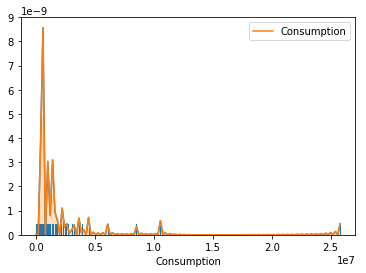

In [142]:
sns.distplot(waterdata_no_negative['Consumption'], hist=False, rug=True);

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


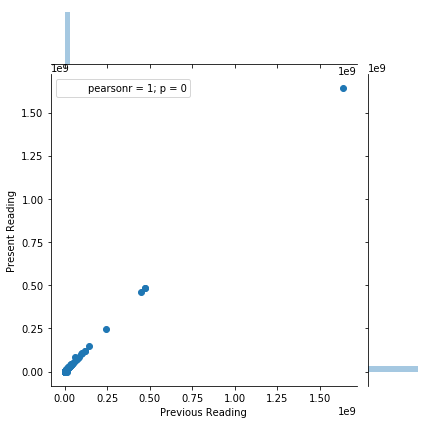

In [155]:
sns.jointplot(x="Previous Reading", y="Present Reading", data=waterdata_no_missing);

In [156]:
import ggplot
from ggplot import aes

ggplot(aes(x='Previous Reading', y='Present Reading  ', color='Consumption', size='Bore Well'), data=waterdata_no_negative) +\
    geom_point() +\
    theme_bw() +\
    xlab("Previous") +\
    ylab("Present") +\
    ggtitle("Previous vs Present")

ModuleNotFoundError: No module named 'ggplot.utils.six'; 'ggplot.utils' is not a package

In [162]:
data = [waterdata_no_missing['Consumption'], waterdata_no_missing['Bore Well']]
py.iplot(data)

NameError: name 'py' is not defined

In [ ]:
data1 = [waterdata_no_missing['Consumption'], waterdata_no_missing['Bore Well'],waterdata_no_missing['Connection Type']]
layout = go.Layout(
    title = "Box Plot Styling Outliers"
)

fig = go.Figure(data=data1,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers")